In [1]:
from analysis.utils import module_reload
module_reload('analysis')
from analysis.import_data import import_true_reco
from analysis.calc import get_kinematics
from analysis.plot_matplotlib import plot_hist, export_figures
import seaborn as sns
import numpy as np

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Select events for VEGAS integration

In [25]:
repo_dir = '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP'

In [2]:
df = import_true_reco()
zhh = df[df['is_zhh'] == 1]
zzh = df[df['is_zzh'] == 1]

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/compare_truejet_matchingreco.root_zhh_zzh.npy


<Axes: xlabel='error_code', ylabel='count'>

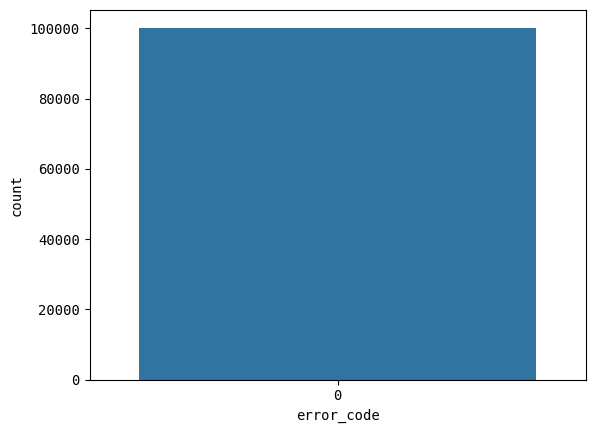

In [3]:
sns.countplot(df, x='error_code')

nZHH * ( 1 + ZZH/ZHH) = nTOT

In [4]:
from analysis.mem_ana import constants
from analysis.mem_ana import load_results

nTOT = 4096
bkg_to_sig = (constants['sigma_zzh']*constants['B_Z_bb'])/(constants['sigma_zhh']*constants['B_H_bb'])

print('bkg_to_sig', bkg_to_sig)

nZHH = int(nTOT / (1 + bkg_to_sig))
nZZH = nTOT - nZHH
print(f'Total of {nTOT} events with {nZHH} ZHH and {nZZH} ZZH')

bkg_to_sig 1.9582742822429062
Total of 4096 events with 1384 ZHH and 2712 ZZH


In [5]:
zhh_indices = df[df['is_zhh'] == True].index
zzh_indices = df[df['is_zzh'] == True].index

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [6]:
np.random.seed(42)
selected_zhh = np.random.choice(zhh_indices, nZHH, replace=False)
selected_zzh = np.random.choice(zzh_indices, nZZH, replace=False)

assert(not 0 in np.unique(df.iloc[selected_zhh]['is_zhh'], return_counts=True)[0])
assert(not 0 in np.unique(df.iloc[selected_zzh]['is_zzh'], return_counts=True)[0])

for i in selected_zhh: print(i)
for i in selected_zzh: print(i)

82391
39911
39980
79920
40000
74548
76975
36968
67281
61610
66181
43734
52323
64089
61968
36949
19004
53344
55672
80104
39179
40960
76542
36963
60328
46834
72475
77189
43762
49838
32771
20045
16895
61928
61083
82747
39426
50844
36920
39384
29096
65488
53290
64094
19350
81093
24324
20142
73522
26884
29308
77445
16833
61895
71973
38434
34966
60927
61273
80263
78206
26886
47680
65655
59416
40075
17674
15519
57939
53609
84014
42059
65815
64003
60781
59247
24122
31313
43487
19805
26269
52964
40657
54634
16024
41553
83746
63410
81220
54643
57795
30793
29518
57428
32589
79075
23857
81298
54899
18247
73924
69887
27040
64141
76507
61967
18213
75035
56400
72036
51100
72300
74906
78668
65443
76015
30669
25866
51356
45733
31388
80699
18667
77108
44865
47926
74714
81638
26090
67134
49440
52109
54401
31693
38363
66904
76767
25094
15035
47019
29911
17370
64633
40381
72441
82130
68876
18221
49260
61267
31617
65053
14785
43731
15942
70185
59396
55903
38937
59988
23408
76361
56893
48069
15324
20897
8281

MEM Consistency: One ZHH and one ZZH event

In [7]:
print(f'ZHH: {selected_zhh[0]}')
print(f'ZZH: {selected_zzh[0]}')

ZHH: 82391
ZZH: 13287


Results for VEGAS

In [85]:
module_reload('analysis')
from analysis.mem_ana import load_results, get_result

results = load_results('/nfs/dust/ilc/user/bliewert/mem_integrate/results', reco=df, use_npy=True, perms_all=True)

No file for event 96364
sig 1384 bkg 1384.38216984342


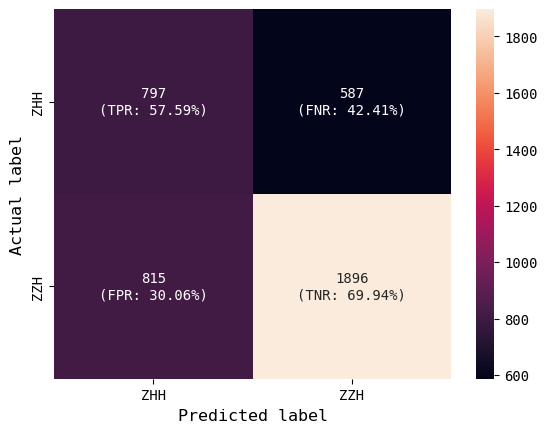

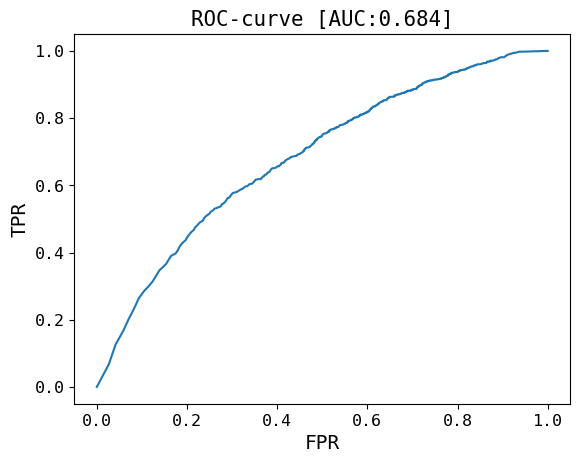

In [86]:
module_reload('analysis')

from analysis.plot_matplotlib import plot_confusion, plot_roc
from analysis.mem_ana import plot_r, best_threshold, conf_mat
from analysis.mem_ana import load_results, get_result

best_t, t_df = best_threshold(results, optimization_scheme=3, return_df=True, nsteps=1000)
confusion = conf_mat(results, threshold=best_t)

fig1 = plot_confusion(confusion)
fig2 = plot_roc(t_df);

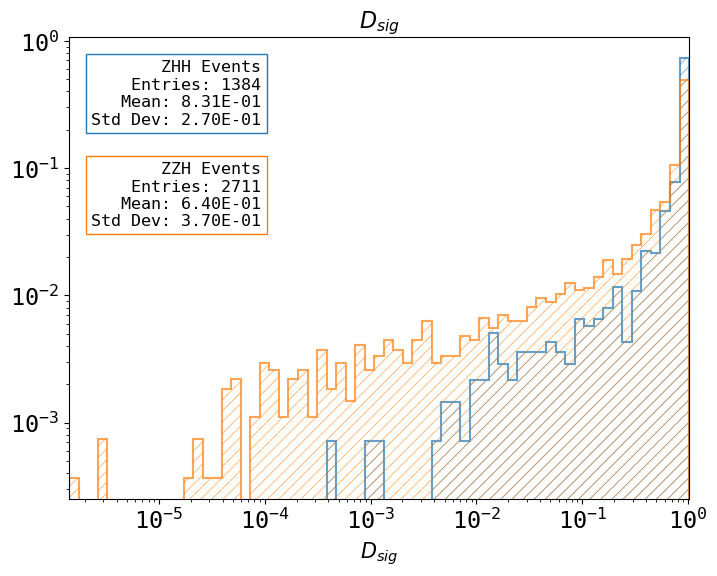

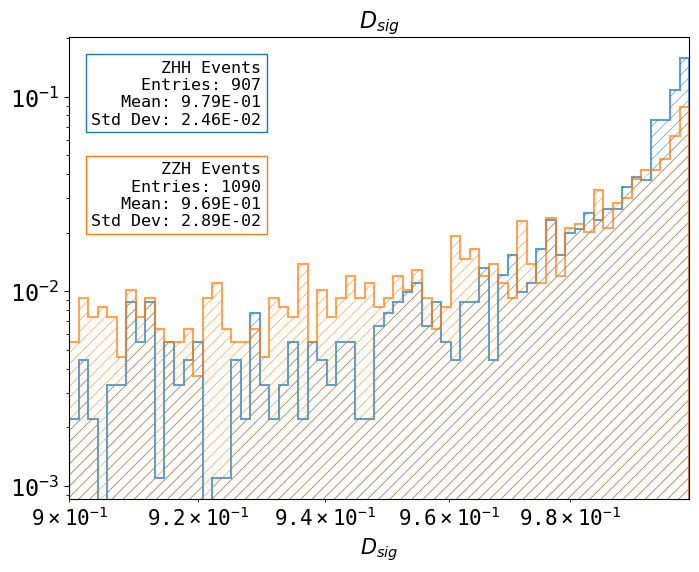

In [87]:
fontsize = 16

fig1 = plot_r(zhh_data=results[results['is_zhh'] == True]['r'], zzh_data=results[results['is_zzh'] == True]['r'],
       kwargs= { 'yscale': 'log', 'text_start_x': 0.31, 'fontsize': fontsize-1, 'ticksize_minor': fontsize-1, 'titlesize': fontsize, 'legendsize': 'large'  });

fig2 = plot_r(zhh_data=results[results['is_zhh'] == True]['r'], zzh_data=results[results['is_zzh'] == True]['r'],
       kwargs= { 'yscale': 'log', 'text_start_x': 0.31, 'fontsize': fontsize-1, 'ticksize_minor': fontsize-1, 'titlesize': fontsize, 'legendsize': 'large',
                'xlim': (9e-1, 0.999999) });

Results Final

In [88]:
module_reload('analysis')
from analysis.mem_ana import load_results, get_result

results = load_results('/nfs/dust/ilc/user/bliewert/mem_integrate/results_final', reco=df, use_npy=True, perms_all=True)

sig 1384 bkg 1384.8928235394153


In [89]:
best_t

0.948949022814406

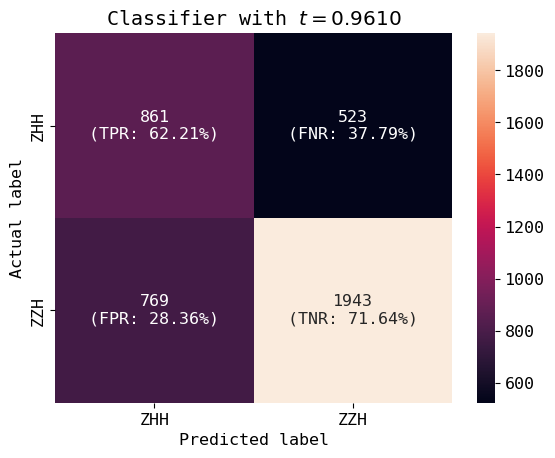

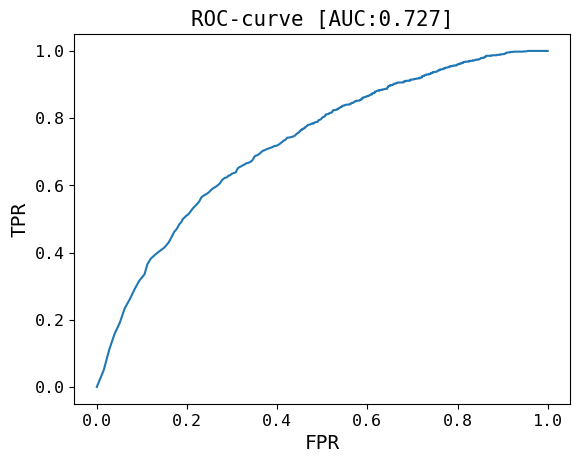

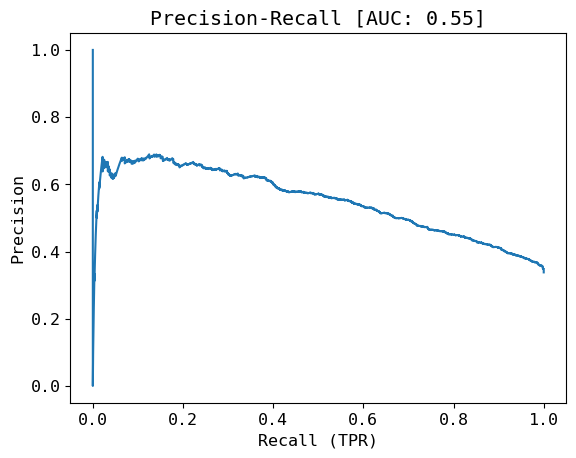

In [115]:
module_reload('analysis')

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from analysis.plot_matplotlib import plot_confusion, plot_roc, export_figures
from analysis.mem_ana import plot_r, best_threshold, conf_mat
from analysis.mem_ana import load_results, get_result

best_t, t_df = best_threshold(results, optimization_scheme=3, return_df=True, nsteps=1000)
confusion = conf_mat(results, threshold=best_t)

precision, recall, thresholds = precision_recall_curve(results['is_zhh'], results['r'])
precrec_auc = auc(recall, precision)

fig1 = plot_confusion(confusion)
fig1.axes[0].set_title(rf'Classifier with $t={best_t:.4f}$')
fig2 = plot_roc(t_df);

fig3, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_title(f'Precision-Recall [AUC: {precrec_auc:.2f}]')
ax.set_xlabel('Recall (TPR)')
ax.set_ylabel('Precision')

export_figures(f'{repo_dir}/notebooks/results/8_vegas.pdf', [fig1, fig2, fig3])

In [116]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(results['is_zhh'], results['r'])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7268000174774498


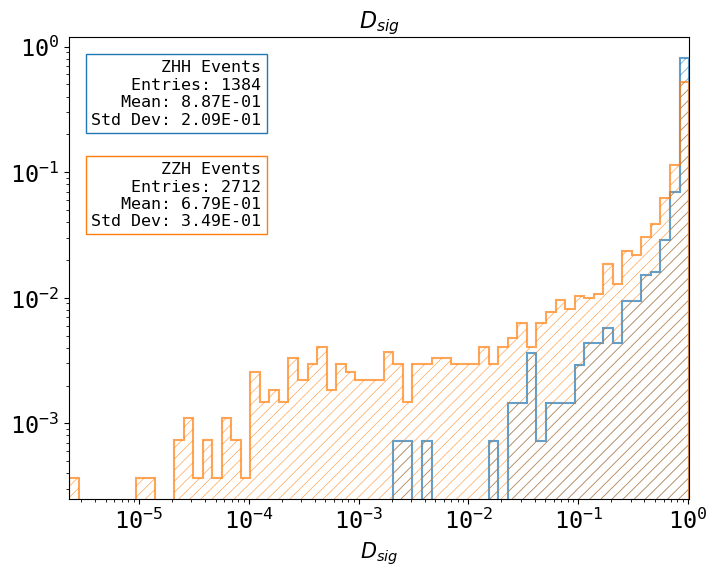

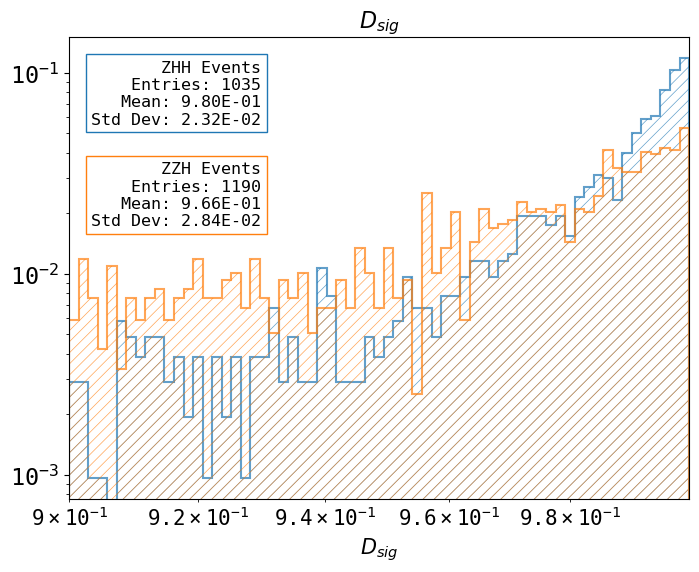

In [91]:
module_reload('analysis')
from analysis.plot_matplotlib import plot_hist
from analysis.mem_ana import plot_r

fontsize = 16

fig1 = plot_r(zhh_data=results[results['is_zhh'] == True]['r'], zzh_data=results[results['is_zzh'] == True]['r'],
       kwargs= { 'yscale': 'log', 'text_start_x': 0.31, 'fontsize': fontsize-1, 'ticksize_minor': fontsize-1, 'titlesize': fontsize, 'legendsize': 'large'  });

fig2 = plot_r(zhh_data=results[results['is_zhh'] == True]['r'], zzh_data=results[results['is_zzh'] == True]['r'],
       kwargs= { 'yscale': 'log', 'text_start_x': 0.31, 'fontsize': fontsize-1, 'ticksize_minor': fontsize-1, 'titlesize': fontsize, 'legendsize': 'large',
                'xlim': (9e-1, 0.999999) });

export_figures(f'{repo_dir}/notebooks/results/8_vegas_discriminator.pdf', [fig1, fig2])

In [70]:
from os import listdir
events = np.array([int(name.replace("event_", "")) for name in listdir('/nfs/dust/ilc/user/bliewert/mem_integrate/results')])

print(np.unique(np.in1d(np.concatenate([selected_zhh, selected_zzh]), results), return_counts=True))

(array([ True]), array([4096]))


In [72]:
df.iloc[events]['is_zhh']

65271    1
30564    1
35550    1
25922    1
25252    1
        ..
68800    1
17231    1
28014    1
18530    1
77442    1
Name: is_zhh, Length: 4066, dtype: int32

In [65]:
np.unique(df.iloc[events]['is_zhh'], return_counts=True)

(array([1], dtype=int32), array([4066]))

In [55]:
np.unique(df[df['event'].isin(results['event'])]['is_zhh'], return_counts=True)

(array([0, 1], dtype=int32), array([ 721, 1203]))

In [56]:
len(results)

4066

In [45]:
sns.countplot(results, x='is_zzh')

ValueError: min() arg is an empty sequence

In [22]:
np.unique(df[df['event'].isin(results['event'])]['is_zhh'], return_counts=True)

(array([0, 1], dtype=int32), array([ 40, 101]))

In [23]:
results['event']

672        672
12232    12232
11321    11321
3825      3825
13588    13588
         ...  
11256    11256
15841    15841
22887    22887
4463      4463
4640      4640
Name: event, Length: 333, dtype: int64

In [ ]:
base_dir = '/'